In [1]:
import torch
from pathlib import Path
import requests
import zipfile
from torch import nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
data_path = Path("/data")
image_path = data_path / "pizza_steak_sushi"

In [4]:
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    # Download pizza, steak, sushi data

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)


Did not find /data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [5]:

import os
def walk_through_dir(dir_path):
  total_test =0
  total_train =0
  for dirpath, dirnames, filenames in os.walk(dir_path):
    if "test" in dirpath:
      total_test += len(filenames)
    if "train" in dirpath:
      total_train += len(filenames)
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  return {"total_test":total_test, "total_trian":total_train}

# data exploratioin
walk_through_dir(image_path)





There are 2 directories and 0 images in '/data/pizza_steak_sushi'.
There are 3 directories and 0 images in '/data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in '/data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in '/data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in '/data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in '/data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in '/data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in '/data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in '/data/pizza_steak_sushi/train/sushi'.


{'total_test': 75, 'total_trian': 225}

In [6]:
#  setup  train and test dir
train_dir = image_path / "train"
test_dir = image_path / "test"

(512, 512, 3)


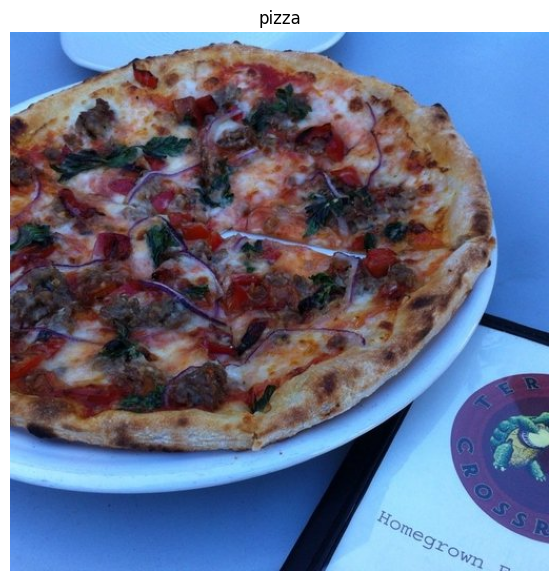

In [7]:
import os
import random
os.listdir(train_dir)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def random_image(dir_path,):
  target_folder = random.choice(os.listdir(dir_path))
  target_folder_path = dir_path / target_folder
  random_image_path = random.choice(os.listdir(target_folder_path))
  img = mpimg.imread(dir_path /target_folder/random_image_path)
  plt.figure(figsize=(10,7))
  print(img.shape)
  plt.imshow(img)
  plt.axis('off')
  plt.title(target_folder)  # Turn off axis labels
  plt.show()
# now we have to make the random images to show

random_image(train_dir)

In [8]:
from torchvision import datasets, transforms
from torchvision.transforms import v2
from torch.utils.data import DataLoader

In [9]:
# define image transformation
image_transforms = transforms.v2.Compose([
    # resize the images to 64 x 64
    transforms.v2.Resize((64,64)),
    # random horizontal flip
    transforms.v2.RandomHorizontalFlip(p=0.5),
    # convet the image to tensor
    transforms.v2.ToImage(), transforms.v2.ToDtype(torch.float32, scale=True)
])

# load datasets
train_dataset = datasets.ImageFolder(train_dir,
                                     transform=image_transforms,
                                     target_transform=None
                                     )
test_dataset = datasets.ImageFolder(test_dir,
                                    transform=image_transforms,
                                    target_transform=None
                                    )

print(train_dataset.classes)
print(train_dataset.class_to_idx)

['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


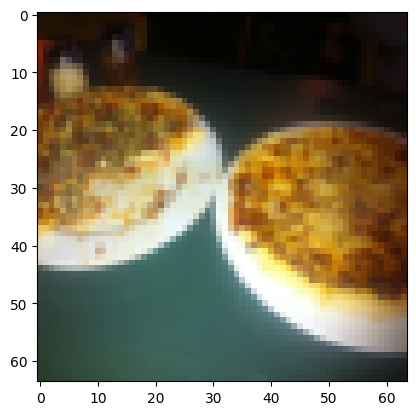

In [10]:
train_dataset[0][0].shape
# show this image
plt.imshow(train_dataset[0][0].permute(1,2,0))

In [11]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 225
    Root location: /data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
                 Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                 RandomHorizontalFlip(p=0.5)
                 ToImage()
                 ToDtype(scale=True)
           )

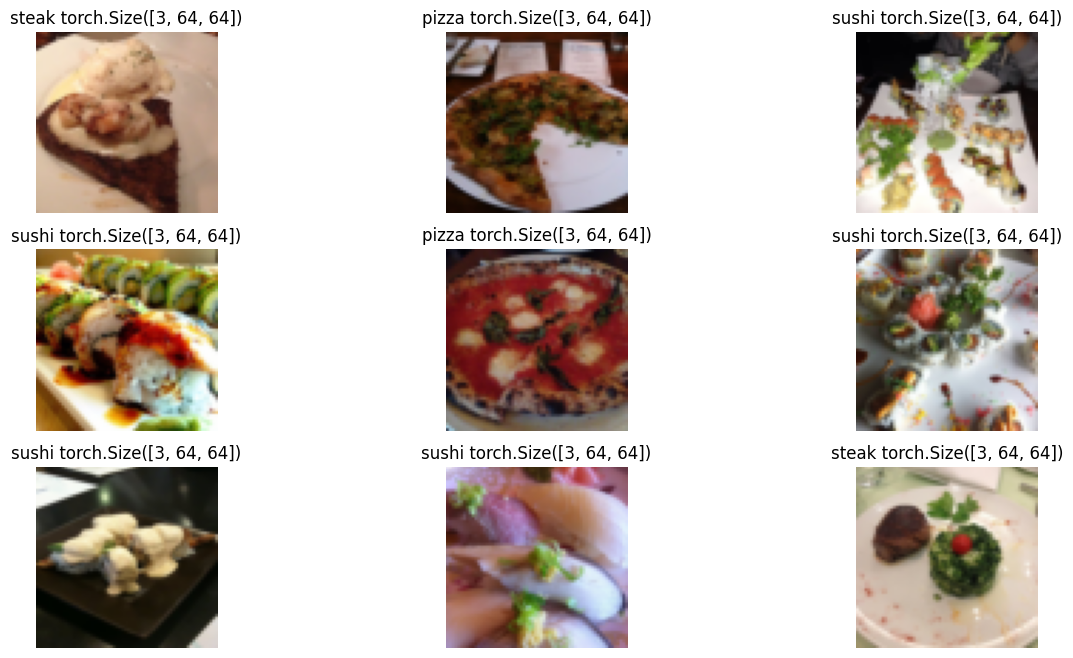

In [12]:
labels_map = {0:'pizza', 1:'steak', 2: 'sushi'}
figure = plt.figure(figsize=(15,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{labels_map[label]} {img.shape}")
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0)) # Permute the dimensions here
plt.show()

In [13]:
class_names = train_dataset.classes
class_names

['pizza', 'steak', 'sushi']

In [14]:
len(train_dataset), len(test_dataset)

(225, 75)

In [15]:
img, label = train_dataset[0][0],train_dataset[0][1]
img.device,img.dtype

(device(type='cpu'), torch.float32)

In [16]:
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=os.cpu_count(), # core cpu of your system
    )
test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=os.cpu_count(), # core cpu of your system
    )

In [17]:
len(train_loader),len(test_loader)

(8, 3)

In [18]:
image, label = next(iter(train_loader))
print(f"Image shape: {image.shape}")
print(f"Label: {label}")

Image shape: torch.Size([32, 3, 64, 64])
Label: tensor([1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2, 1, 0,
        1, 0, 0, 2, 2, 2, 2, 2])


Feature batch shape: torch.Size([32, 3, 64, 64])
Labels batch shape: torch.Size([32])


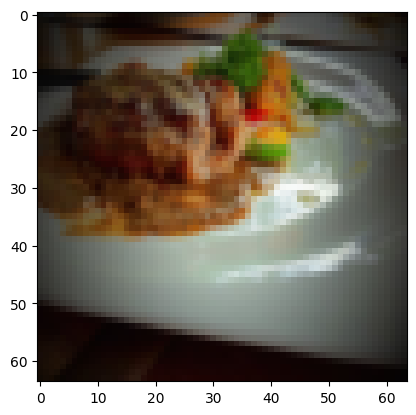

Label: steak


In [19]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0))
plt.show()
print(f"Label: {class_names[label]}")

In [20]:
os.listdir(train_dir)
# train_dir
# train
  #pizza
    #1.jpg
    #2.jpg
    #3.jpg
    #4.jpg
    #5.jpg
  #steak
    #1.jpg
    #2.jpg
    #3.jpg
    #4.jpg
    #5.jpg
  #sushi
    #1.jpg
    #2.jpg
    #3.jpg
    #4.jpg
    #5.jpg

['pizza', 'steak', 'sushi']

## Creating a Custom Dataset for your files

In [21]:
import os
from typing import Tuple, Dict, List

# now we have to find the name of the target and make
directory_path = test_dir


def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  class_name_found = []
  try:
      with os.scandir(directory_path) as entries:
          for entry in entries:
              if entry.is_file():
                  print(f"File: {entry.name} (Path: {entry.path})")
              elif entry.is_dir():
                  print(f"Directory: {entry.name} (Path: {entry.path})")
                  class_name_found.append(entry.name)
              else:
                  print(f"Other entry: {entry.name} (Path: {entry.path})")
  except FileNotFoundError:
      print(f"Error: Directory '{directory_path}' not found.")
  except Exception as e:
   print(f"An error occurred: {e}")
  class_name_found = sorted(class_name_found)
  class_to_idx = {cls_name: i for i, cls_name in enumerate(class_name_found)}
  return class_name_found, class_to_idx




In [22]:
# now we have to create our own dataset function to load the images from the folder
from torch.utils.data import Dataset
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
      # get all the images path
        self.images_path = list(Path(img_dir).glob("*/*.jpg"))
        # setup transform
        self.transform = transform
        # setup target_transform
        self.target_transform = target_transform
        self.classes, self.class_to_idx = find_classes(img_dir)

    def __len__(self)-> int:
        return len(self.images_path)

    def load_image(self, index:int):
      return decode_image(self.images_path[index])

    def __getitem__(self, idx:int)-> Tuple[torch.Tensor,int]:
        image = self.load_image(idx)
        label = self.class_to_idx[self.images_path[idx].parent.name]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label




In [23]:
train_data = CustomImageDataset(train_dir, transform=image_transforms)
test_data = CustomImageDataset(test_dir, transform=image_transforms)
print(train_data.class_to_idx)
print(train_data.classes)
train_data[0][0]

Directory: pizza (Path: /data/pizza_steak_sushi/test/pizza)
Directory: steak (Path: /data/pizza_steak_sushi/test/steak)
Directory: sushi (Path: /data/pizza_steak_sushi/test/sushi)
Directory: pizza (Path: /data/pizza_steak_sushi/test/pizza)
Directory: steak (Path: /data/pizza_steak_sushi/test/steak)
Directory: sushi (Path: /data/pizza_steak_sushi/test/sushi)
{'pizza': 0, 'steak': 1, 'sushi': 2}
['pizza', 'steak', 'sushi']


Image([[[0.2941, 0.2824, 0.2745,  ..., 0.3020, 0.3020, 0.2902],
        [0.3333, 0.3294, 0.3216,  ..., 0.3098, 0.3020, 0.2902],
        [0.4627, 0.4510, 0.4392,  ..., 0.3137, 0.3059, 0.2902],
        ...,
        [0.0275, 0.0314, 0.0314,  ..., 0.6863, 0.6784, 0.6902],
        [0.0314, 0.0275, 0.0275,  ..., 0.6392, 0.6157, 0.5451],
        [0.0275, 0.0275, 0.0275,  ..., 0.5490, 0.5412, 0.4039]],

       [[0.3686, 0.3569, 0.3529,  ..., 0.2824, 0.2784, 0.2667],
        [0.4157, 0.4118, 0.4078,  ..., 0.2980, 0.2941, 0.2784],
        [0.4824, 0.4745, 0.4627,  ..., 0.3137, 0.3059, 0.2863],
        ...,
        [0.0275, 0.0314, 0.0314,  ..., 0.5490, 0.5529, 0.5647],
        [0.0314, 0.0275, 0.0314,  ..., 0.4863, 0.4667, 0.3804],
        [0.0275, 0.0275, 0.0314,  ..., 0.3647, 0.3686, 0.2118]],

       [[0.4667, 0.4667, 0.4588,  ..., 0.3059, 0.3020, 0.2902],
        [0.5098, 0.5176, 0.5098,  ..., 0.3373, 0.3294, 0.3176],
        [0.5216, 0.5098, 0.5098,  ..., 0.3608, 0.3490, 0.3294],
        ..

torch.Size([3, 64, 64])


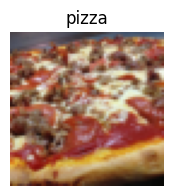

In [24]:
img_tensor, label = train_data[0] # Get the image tensor and label
plt.figure(figsize=(2,2))
print(img_tensor.shape)
plt.imshow(img_tensor.permute(1, 2, 0)) # Permute the dimensions for matplotlib
plt.title(train_data.classes[label]) # Add title using the label
plt.axis('off') # Turn off axis
plt.show()

In [25]:
list(Path(train_dir).glob("*/*.jpg"))[0]

PosixPath('/data/pizza_steak_sushi/train/pizza/3109486.jpg')

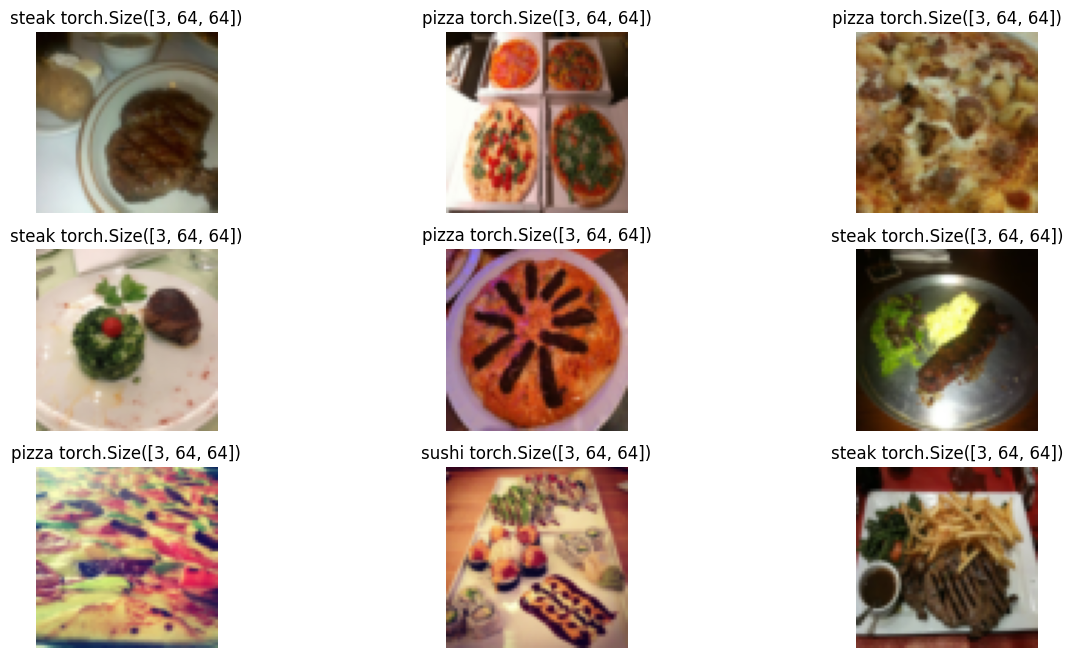

In [26]:
labels_map = {0:'pizza', 1:'steak', 2: 'sushi'}
figure = plt.figure(figsize=(15,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{labels_map[label]} {img.shape}")
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0)) # Permute the dimensions here
plt.show()

In [27]:
# DATA LOADER FOR CUSTOM TRAIN AND TEST DATA
train_dataloader = DataLoader(
    train_data,
    batch_size=32,
    shuffle=True,
    num_workers=os.cpu_count(), # core cpu of your system
    )
test_dataloader = DataLoader(
    test_data,
    batch_size=32,
    shuffle=False,
    num_workers=os.cpu_count(), # core cpu of your system
    )


In [28]:
image, label = next(iter(train_dataloader))
image.shape,label

(torch.Size([32, 3, 64, 64]),
 tensor([2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2,
         2, 2, 0, 0, 1, 0, 2, 2]))

In [29]:
image[0].shape

torch.Size([3, 64, 64])

Feature batch shape: torch.Size([32, 3, 64, 64])
Labels batch shape: torch.Size([32])


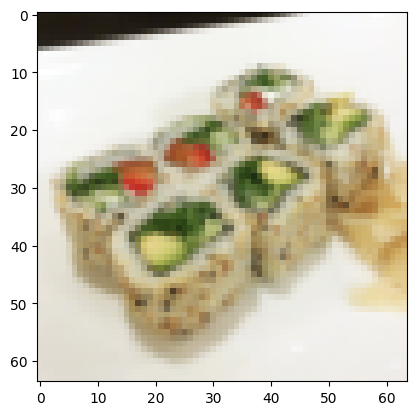

Label: sushi


In [30]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0))
plt.show()
print(f"Label: {class_names[label]}")

## Building our Base Model For Food Classification Problem

In [31]:
from torch import nn

In [32]:
# define image transformation
image_transforms = transforms.v2.Compose([
    transforms.v2.Resize((64,64)),
    transforms.v2.ToImage(), transforms.v2.ToDtype(torch.float32, scale=True)
])

# load datasets
train_dataset_sample = datasets.ImageFolder(train_dir,
                                     transform=image_transforms,
                                     target_transform=None
                                     )
test_dataset_sample = datasets.ImageFolder(test_dir,
                                    transform=image_transforms,
                                    target_transform=None
                                    )

train_dataloader_sample = DataLoader(
    train_dataset_sample,
    batch_size=32,
    shuffle=True,
    num_workers=os.cpu_count(), # core cpu of your system
    )
test_dataloader_sample = DataLoader(
    test_dataset_sample,
    batch_size=32,
    shuffle=False,
    num_workers=os.cpu_count(), # core cpu of your system
  )



In [55]:
class TinyVGG16(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int ) -> None:
    super().__init__()
    self.flatten = nn.Flatten()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16, out_features=output_shape)
    )

  def forward(self,x):
      x = self.conv_block_1(x)
      x = self.conv_block_2(x)
      x = self.classifier(x)
      return x



In [56]:

# creation of the model
torch.manual_seed(42)
model_0 = TinyVGG16(
    input_shape=3,
    hidden_units=10,
    output_shape=3
    ).to(device)
print(model_0)

TinyVGG16(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)


In [57]:
image,label= next(iter(train_dataloader_sample))


In [58]:
model_0(image.to(device)).shape

torch.Size([32, 3])

In [59]:
16*16*10

2560

## TorchInfo

In [60]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary

In [61]:
summary(model_0, input_size=image.shape)

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG16                                [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia